In [81]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("meirnizri/covid19-dataset")

#print("Path to dataset files:", path)

In [82]:
#import numpy as np
#import pandas as pd
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# START

In [83]:
# Install kagglehub if not already installed
#%pip install kagglehub

In [84]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:

import kagglehub
import numpy as np
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("meirnizri/covid19-dataset")

print("Path to dataset files:", path)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f"Processing file: {filepath}")
        try:
          # Attempt to read as CSV
          df = pd.read_csv(filepath, nrows=50000)
          print(f"Successfully read first 50000 rows of {filename}")
          # Now you can work with the first 50000 rows in the DataFrame 'df'
        except pd.errors.ParserError:
          print(f"Could not parse {filename} as a CSV file. Skipping.")
        except Exception as e:
          print(f"An error occurred while reading {filename}: {e}")

Path to dataset files: C:\Users\QC\.cache\kagglehub\datasets\meirnizri\covid19-dataset\versions\1


In [86]:
# Construct the correct file path using the 'path' variable
file_path = os.path.join(path, 'Covid Data.csv')
covid_df = pd.read_csv(file_path, nrows=10000)
#covid_df = covid.head(5000)
covid = covid_df.copy()
print('Data Shape:', covid.shape)

Data Shape: (10000, 21)


* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [87]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [88]:
covid = covid.rename(columns={'SEX': 'GENDER'})

In [89]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 10000 non-null  int64 
 1   MEDICAL_UNIT          10000 non-null  int64 
 2   GENDER                10000 non-null  int64 
 3   PATIENT_TYPE          10000 non-null  int64 
 4   DATE_DIED             10000 non-null  object
 5   INTUBED               10000 non-null  int64 
 6   PNEUMONIA             10000 non-null  int64 
 7   AGE                   10000 non-null  int64 
 8   PREGNANT              10000 non-null  int64 
 9   DIABETES              10000 non-null  int64 
 10  COPD                  10000 non-null  int64 
 11  ASTHMA                10000 non-null  int64 
 12  INMSUPR               10000 non-null  int64 
 13  HIPERTENSION          10000 non-null  int64 
 14  OTHER_DISEASE         10000 non-null  int64 
 15  CARDIOVASCULAR        10000 non-null 

In [90]:
covid.describe()

,USMER,MEDICAL_UNIT,GENDER,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.435200,2.952900,1.507700,1.331700,66.373800,1.913700,46.134600,50.284700,2.003400,2.168800,2.163500,2.216600,1.967600,2.278800,2.203400,1.961200,2.163000,2.165000,3.311300,66.412300
std,0.495808,0.274024,0.499966,0.470847,44.495987,4.979652,16.557092,47.500946,4.206086,4.182972,4.293671,4.699733,4.210216,5.339805,4.701727,3.864969,4.293748,4.707312,0.982491,44.450493
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,1.000000,3.000000,2.000000,1.000000,97.000000,2.000000,46.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
75%,2.000000,3.000000,2.000000,2.000000,97.000000,2.000000,57.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
max,2.000000,3.000000,2.000000,2.000000,99.000000,99.000000,103.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


**Number of Unique Values by column**

In [91]:
for col in covid.columns :
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>          3
GENDER               =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        161
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        100
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [92]:
print('Percentage of missing values')
for col in covid.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(covid[(covid[col]==98) | (covid[col]==99) | (covid[col]==97)])/len(covid)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
GENDER               =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      67.81%
PNEUMONIA            =>       0.26%
AGE                  =>       0.03%
PREGNANT             =>      50.83%
DIABETES             =>       0.19%
COPD                 =>       0.19%
ASTHMA               =>       0.20%
INMSUPR              =>       0.24%
HIPERTENSION         =>       0.19%
OTHER_DISEASE        =>       0.31%
CARDIOVASCULAR       =>       0.24%
OBESITY              =>       0.16%
RENAL_CHRONIC        =>       0.20%
TOBACCO              =>       0.24%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      67.82%


### Explore Dataset

In [93]:
covid['INTUBED'].value_counts()

INTUBED
97    6683
2     2566
1      653
99      98
Name: count, dtype: int64

In [94]:
covid['PNEUMONIA'].value_counts()

PNEUMONIA
2     6589
1     3385
99      26
Name: count, dtype: int64

In [95]:
covid['AGE'].value_counts()

AGE
46     269
45     264
48     263
47     247
51     247
      ... 
95       2
103      1
100      1
94       1
96       1
Name: count, Length: 100, dtype: int64

In [96]:
covid['PREGNANT'].value_counts()

PREGNANT
97    5077
2     4873
1       44
98       6
Name: count, dtype: int64

In [97]:
covid['DIABETES'].value_counts()

DIABETES
2     8191
1     1790
98      19
Name: count, dtype: int64

In [98]:
covid['COPD'].value_counts()

COPD
2     9845
1      136
98      19
Name: count, dtype: int64

In [99]:
covid['ASTHMA'].value_counts()

ASTHMA
2     9695
1      285
98      20
Name: count, dtype: int64

In [100]:
covid['INMSUPR'].value_counts()

INMSUPR
2     9838
1      138
98      24
Name: count, dtype: int64

In [101]:
covid['HIPERTENSION'].value_counts()

HIPERTENSION
2     7833
1     2148
98      19
Name: count, dtype: int64

In [102]:
covid['OTHER_DISEASE'].value_counts()

OTHER_DISEASE
2     9781
1      188
98      31
Name: count, dtype: int64

In [103]:
covid['CARDIOVASCULAR'].value_counts()

CARDIOVASCULAR
2     9706
1      270
98      24
Name: count, dtype: int64

In [104]:
covid['TOBACCO'].value_counts()

TOBACCO
2     9322
1      654
98      24
Name: count, dtype: int64

In [105]:
covid['ICU'].value_counts()

ICU
97    6683
2     2853
1      365
99      99
Name: count, dtype: int64

* INTUBED, PREGNANT, ICU : have many missing values, indicated by 97,99
* other columns have smaller missing values, indicated by 98

## year

In [106]:
# Filter rows where DATE_DIED is not equal to '9999-99-99'
valid_dates = covid[covid['DATE_DIED'] != '9999-99-99']

# Convert DATE_DIED to datetime format
valid_dates['DATE_DIED'] = pd.to_datetime(valid_dates['DATE_DIED'], errors='coerce')

# Extract YEAR, QUARTER, MONTH, and DAY
valid_dates['YEAR'] = valid_dates['DATE_DIED'].dt.year
valid_dates['QUARTER'] = valid_dates['DATE_DIED'].dt.quarter
valid_dates['MONTH'] = valid_dates['DATE_DIED'].dt.month
valid_dates['DAY'] = valid_dates['DATE_DIED'].dt.day

# Update the original dataframe
#covid.update(valid_dates[['YEAR', 'QUARTER', 'MONTH', 'DAY']])

C:\Users\QC\AppData\Local\Temp\ipykernel_2900\3626237598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_dates['DATE_DIED'] = pd.to_datetime(valid_dates['DATE_DIED'], errors='coerce')
C:\Users\QC\AppData\Local\Temp\ipykernel_2900\3626237598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_dates['YEAR'] = valid_dates['DATE_DIED'].dt.year
C:\Users\QC\AppData\Local\Temp\ipykernel_2900\3626237598.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [107]:
print(valid_dates[['YEAR', 'QUARTER', 'MONTH', 'DAY']].head())

     YEAR  QUARTER  MONTH  DAY
0  2020.0      1.0    3.0  5.0
1  2020.0      1.0    3.0  6.0
2  2020.0      3.0    9.0  6.0
3  2020.0      4.0   12.0  6.0
4     NaN      NaN    NaN  NaN


In [108]:
#print([['DATE_DIED', 'YEAR', 'QUARTER', 'MONTH', 'DAY']].head())

In [109]:
#print(covid[['DATE_DIED'] == '9999-99-99'].value_counts())

In [110]:
covid['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    8547
5     634
7     430
4     193
1     112
6      60
2      24
Name: count, dtype: int64

* ***1-3*** : the patient was **diagnosed with covid** in different degrees
* ***4-7*** : the patient is **not a carrier of covid** or that the **test is inconclusive**

### Data Preprocessing

Get rid of missing values
* except for INTUBED, PREGNANT, ICU columns since they have too many

In [111]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'GENDER', 'PATIENT_TYPE', 'DATE_DIED',
       'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [112]:
covid_copy = covid.copy()

In [113]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

In [114]:
for col in covid.columns :
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>          3
GENDER               =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        151
INTUBED              =>          4
PNEUMONIA            =>          2
AGE                  =>        100
PREGNANT             =>          4
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [115]:
# Convert DATE_DIED column to datetime format
#covid['DATE_DIED'] = pd.to_datetime(covid['DATE_DIED'], errors='coerce')

# Extract year, quarter, and month
#covid['YEAR'] = covid['DATE_DIED'].dt.year
#covid['QUARTER'] = covid['DATE_DIED'].dt.quarter
#covid['MONTH'] = covid['DATE_DIED'].dt.month
#covid['DAY'] = covid['DATE_DIED'].dt.day

# Change the date format to DD-MM-YYYY (optional, if needed for display purposes)
#covid['DATE_DIED'] = covid['DATE_DIED'].dt.strftime('%d-%m-%Y')



In [116]:
#print(covid['DAY'].value_counts())

In [117]:
#print(covid['MONTH'].value_counts())
#print(covid['QUARTER'].value_counts())
#print(covid['YEAR'].value_counts())
#print(covid['DAY'].value_counts())

In [118]:
#covid[['DAY', 'MONTH', 'QUARTER', 'YEAR']] = covid[['DAY', 'MONTH', 'QUARTER', 'YEAR']].fillna('NaN').astype(int)

'DATE_DIED' column to binary 'DEATH' column

In [119]:
covid['DEATH'] = [2 if row=='9999-99-99' else 1 for row in covid['DATE_DIED']]

In [120]:
covid['DEATH'].value_counts()

DEATH
2    8448
1    1466
Name: count, dtype: int64

In [121]:
#Droping the columns that are not needed
covid.drop(columns=['INTUBED','ICU'],inplace=True)

In [122]:
print('MALE',covid.query('GENDER==2')['PREGNANT'].value_counts(), sep='\n')
print('FEMALE',covid.query('GENDER==1')['PREGNANT'].value_counts(), sep='\n')

MALE
PREGNANT
97    5036
Name: count, dtype: int64
FEMALE
PREGNANT
2     4828
1       44
98       6
Name: count, dtype: int64


In [123]:
covid['PREGNANT'] = covid['PREGNANT'].replace(97,2)
covid['PREGNANT'] = covid['PREGNANT'].replace(98,2)

**Check the Dataset after preprocessing :**

In [124]:
covid.shape

(9914, 20)

* DataFrame length reduced from 1,048,575 to 1,025,152

In [125]:
for col in covid.columns :
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>          3
GENDER               =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        151
PNEUMONIA            =>          2
AGE                  =>        100
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
DEATH                =>          2


In [126]:
print('Percentage of missing values')
for col in covid.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(covid[(covid[col]==98) | (covid[col]==99) | (covid[col]==97)])/len(covid)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
GENDER               =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
PNEUMONIA            =>       0.00%
AGE                  =>       0.03%
PREGNANT             =>       0.00%
DIABETES             =>       0.00%
COPD                 =>       0.00%
ASTHMA               =>       0.00%
INMSUPR              =>       0.00%
HIPERTENSION         =>       0.00%
OTHER_DISEASE        =>       0.00%
CARDIOVASCULAR       =>       0.00%
OBESITY              =>       0.00%
RENAL_CHRONIC        =>       0.00%
TOBACCO              =>       0.00%
CLASIFFICATION_FINAL =>       0.00%
DEATH                =>       0.00%


## Data Visualization, EDA

##  time

In [130]:
# Convert DATE_DIED to datetime format
covid['DATE_DIED'] = pd.to_datetime(covid['DATE_DIED'], errors='coerce')

# Extract YEAR, QUARTER, MONTH, and DAY
covid['YEAR'] = covid['DATE_DIED'].dt.year
covid['QUARTER'] = covid['DATE_DIED'].dt.quarter
covid['MONTH'] = covid['DATE_DIED'].dt.month
covid['DAY'] = covid['DATE_DIED'].dt.day

# Convert MONTH, YEAR, and QUARTER to integers
covid['MONTH'] = pd.to_numeric(covid['MONTH'], errors='coerce')
covid['YEAR'] = pd.to_numeric(covid['YEAR'], errors='coerce')
covid['QUARTER'] = pd.to_numeric(covid['QUARTER'], errors='coerce')


In [131]:
# Filter rows where DATE_DIED is not equal to '9999-99-99'
valid_dates = covid[covid['DATE_DIED'] != '9999-99-99']

# Convert DATE_DIED to datetime format
valid_dates['DATE_DIED'] = pd.to_datetime(valid_dates['DATE_DIED'], errors='coerce')

# Extract YEAR, QUARTER, MONTH, and DAY
valid_dates['YEAR'] = valid_dates['DATE_DIED'].dt.year
valid_dates['QUARTER'] = valid_dates['DATE_DIED'].dt.quarter
valid_dates['MONTH'] = valid_dates['DATE_DIED'].dt.month
valid_dates['DAY'] = valid_dates['DATE_DIED'].dt.day
# Convert MONTH, YEAR, and QUARTER to integers
#valid_dates['MONTH'] = pd.to_numeric(valid_dates['MONTH'], errors='coerce')
#valid_dates['YEAR'] = pd.to_numeric(valid_dates['YEAR'], errors='coerce')
#valid_dates['QUARTER'] = pd.to_numeric(valid_dates['QUARTER'], errors='coerce')

valid_dates['YEAR'] = valid_dates['YEAR'].fillna(0).astype(int)
valid_dates['QUARTER'] = valid_dates['QUARTER'].fillna(0).astype(int)
valid_dates['MONTH'] = valid_dates['MONTH'].fillna(0).astype(int)

# Update the original dataframe
#covid.update(valid_dates[['YEAR', 'QUARTER', 'MONTH', 'DAY']])

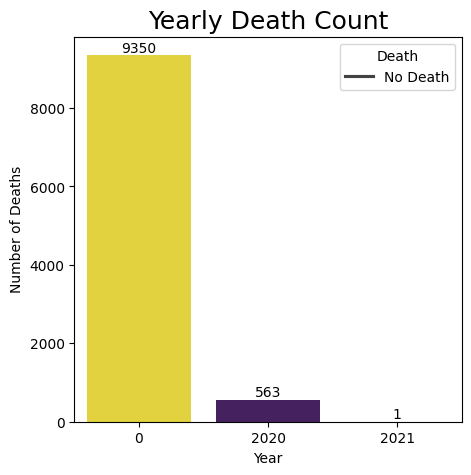

In [132]:
# Count the number of deaths per year
yearly_deaths = valid_dates['YEAR'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(5,5))
ax=sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, hue=valid_dates['YEAR'].value_counts() ,palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Yearly Death Count", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()


C:\Users\QC\AppData\Local\Temp\ipykernel_2900\80492659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=valid_dates['YEAR'], palette="viridis")


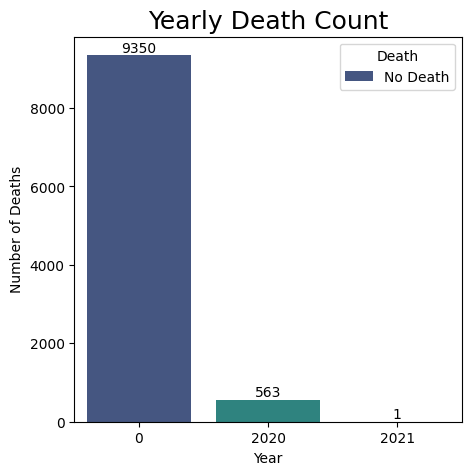

In [133]:
# Count the number of deaths per year
#yearly_deaths = valid_dates['YEAR'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(5,5))
ax=sns.countplot(x=valid_dates['YEAR'], palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Yearly Death Count", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()

C:\Users\QC\AppData\Local\Temp\ipykernel_2900\1288854988.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=valid_dates['QUARTER'], palette="viridis")


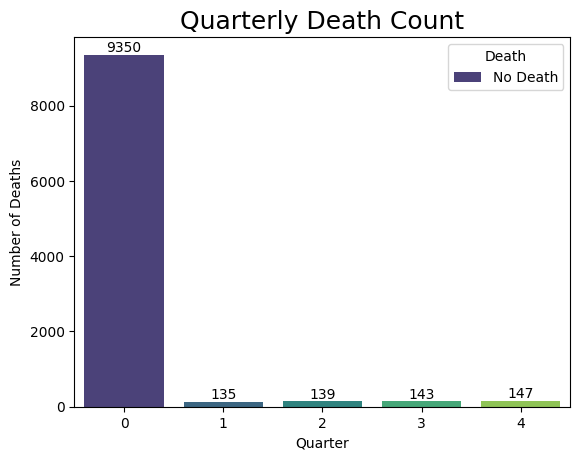

In [134]:
ax=sns.countplot(x=valid_dates['QUARTER'], palette="viridis")
plt.title("Quarterly Death Count", fontsize=18)
plt.xlabel('Quarter')
plt.ylabel('Number of Deaths')
for container in ax.containers:
    ax.bar_label(container)
#plt.legend(title='Death', loc='upper right', labels=['No Death', 'Death'])
plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()

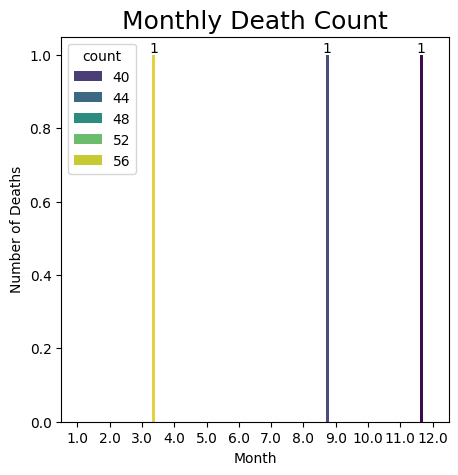

In [135]:
# Count the number of deaths per MONTH
#onthly_deaths = valid_dates['MONTH'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(5,5))
ax=sns.countplot(x=covid['MONTH'], hue=covid['MONTH'].value_counts() , palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Monthly Death Count", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
#plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()

C:\Users\QC\AppData\Local\Temp\ipykernel_2900\1199917207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=valid_dates['MONTH'], palette="viridis")


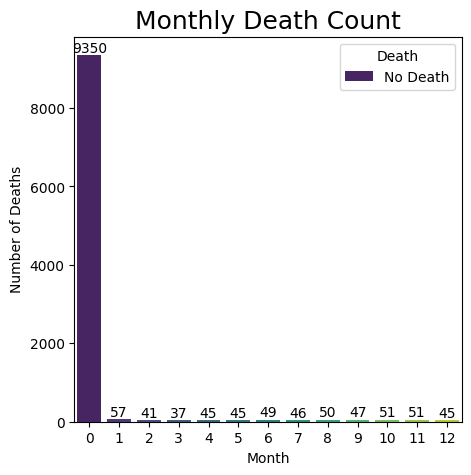

In [136]:
# Count the number of deaths per MONTH
#onthly_deaths = valid_dates['MONTH'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(5,5))
ax=sns.countplot(x=valid_dates['MONTH'], palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Monthly Death Count", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()

C:\Users\QC\AppData\Local\Temp\ipykernel_2900\3695255502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette="viridis")


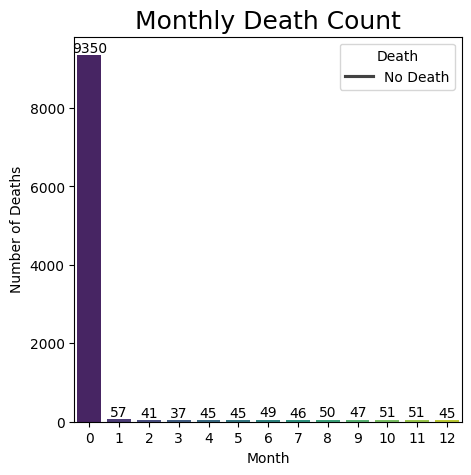

In [137]:
# Count the number of deaths per MONTH
monthly_deaths = valid_dates['MONTH'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(5,5))
ax=sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Monthly Death Count", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.legend(title='Death', loc='upper right', labels=['No Death'])
plt.show()

C:\Users\QC\AppData\Local\Temp\ipykernel_2900\2860452130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='MONTH', y='count', data=monthly_deaths_full, palette="viridis")


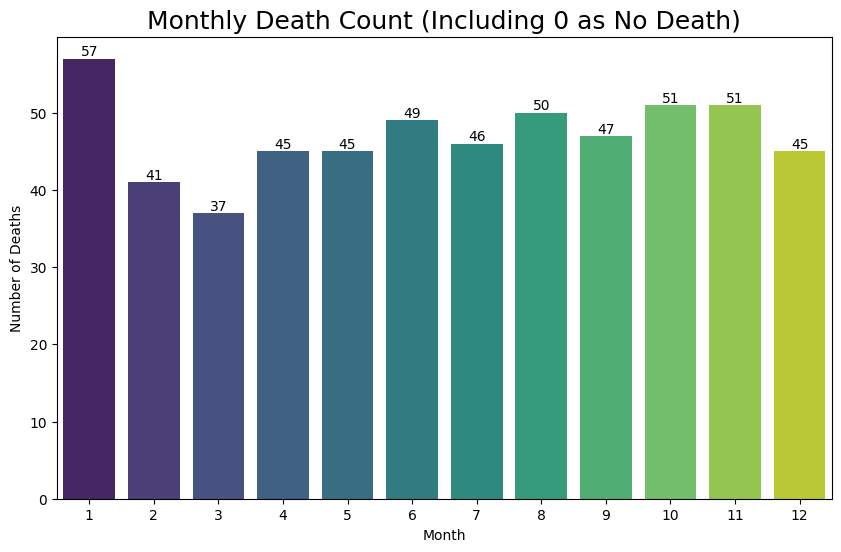

In [ ]:
# Ensure all months (1 to 12) are represented, even if they have 0 deaths
all_months = pd.Series(range(1, 13), name='MONTH')
monthly_deaths_full = all_months.to_frame().merge(monthly_deaths, on='MONTH', how='left')#.fillna(0)
#monthly_deaths_full['count'] = monthly_deaths_full['count'].astype(int)

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MONTH', y='count', data=monthly_deaths_full, palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Monthly Death Count (Including 0 as No Death)", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.show()

<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

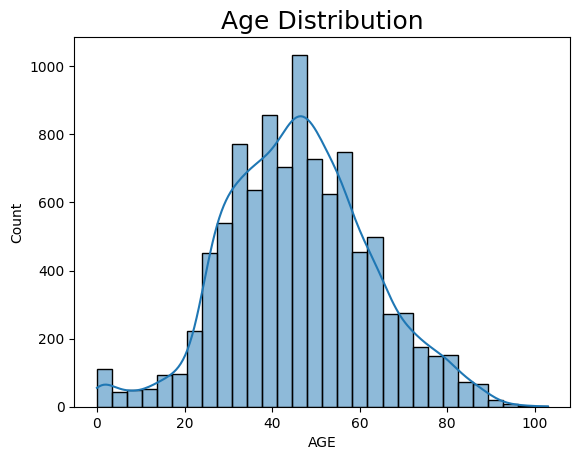

In [ ]:
plt.title('Age Distribution', fontsize=18)
sns.histplot(data=covid, x=covid['AGE'],bins=30, kde=True)

In [ ]:
bb

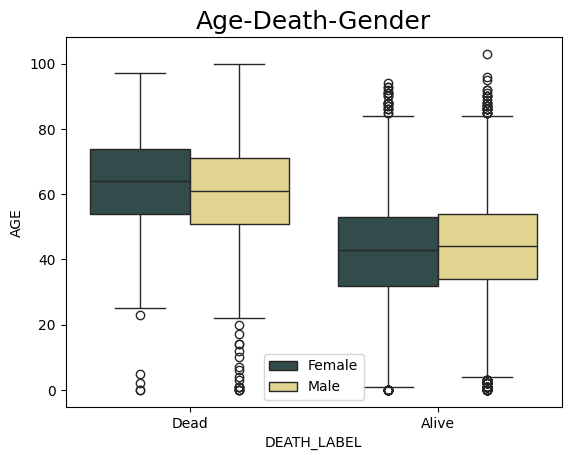

In [ ]:
# Map GENDER column to meaningful labels
covid['GENDER_LABEL'] = covid['GENDER'].map({1: 'Female', 2: 'Male'})
# Map DEATH column to meaningful labels
covid['DEATH_LABEL'] = covid['DEATH'].map({1: 'Dead', 2: 'Alive'})
# Plot the boxplot
sns.boxplot(x=covid['DEATH_LABEL'], y="AGE", hue="GENDER_LABEL", data=covid, palette=sns.color_palette(["#2f4f4f", "#eedd82"]))
plt.title("Age-Death-Gender", fontsize=18)
plt.legend(loc="best")


Gender

Text(0, 0.5, 'Death Count')

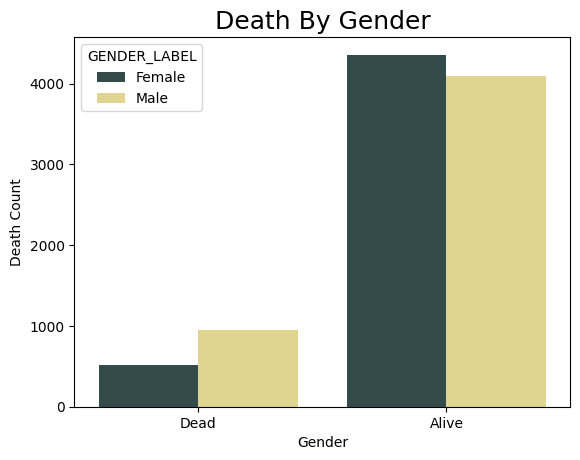

In [ ]:
sns.countplot(x=covid['DEATH_LABEL'], hue='GENDER_LABEL', data=covid, palette=sns.color_palette(["#2f4f4f", "#eedd82"]))
plt.title("Death By Gender", fontsize=18)
plt.xlabel("Gender")
plt.ylabel("Death Count")


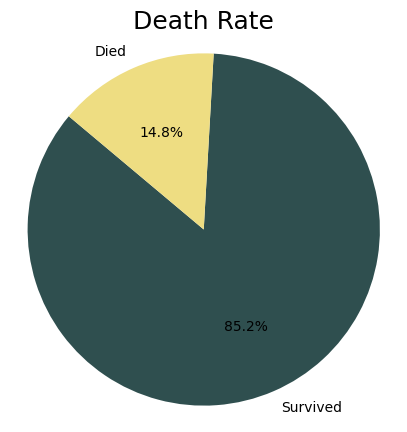

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(covid['DEATH'].value_counts(), labels=['Survived', 'Died'], autopct='%1.1f%%', startangle=140, colors=["#2f4f4f","#eedd82"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Death Rate', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Correlation Between Features')

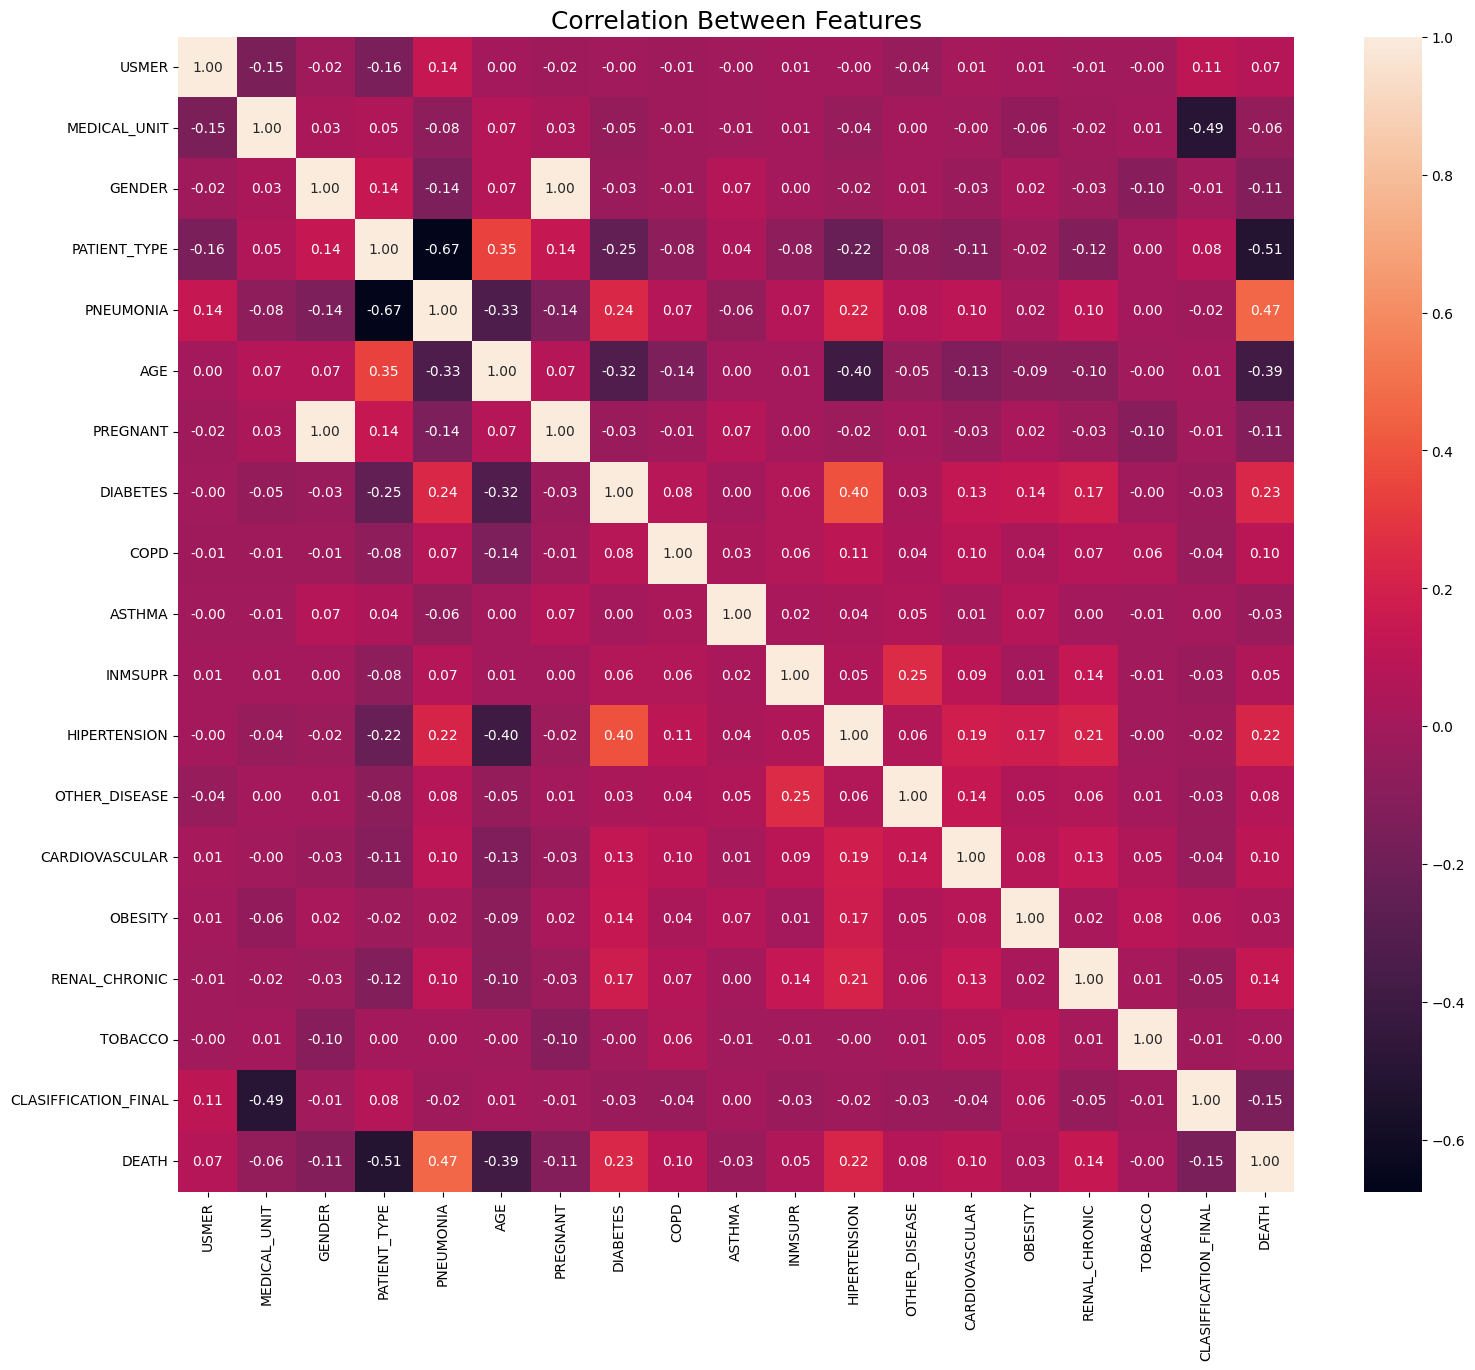

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)

In [ ]:
Pneumonia, Diabetes, COPD, Asthma, Immunosuppression, Hypertension, Other Disease, Cardiovascular, Obesity, Renal Chronic, Tobacco

* Drop values that doesn't have a **positive correlataion with DEATH column**

Scale Numeric feature(i.e. Age)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
covid['AGE'] = standard_scaler.fit_transform(covid.loc[:,['AGE']])

**Determine X,Y data**

In [ ]:
y = covid['DEATH']
x = covid.drop('DEATH', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (7931, 18)
Test X : (1983, 18)
Train Y : (7931,)
Test Y : (1983,)


## Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", log_reg.score(test_x, test_y))

Logistic Regression Accuracy : 0.8900655572365104


In [ ]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score : ", f1_score(test_y, log_reg.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.61209964 0.9359577 ]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

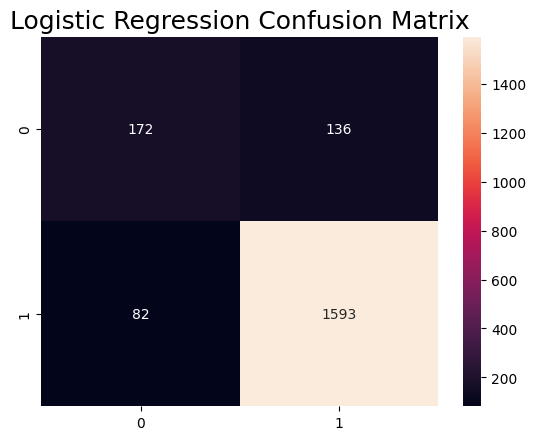

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

<ipython-input-36-e35a7af3c3f2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=covid['DEATH'],palette='ch:start=.2,rot=-.3')


Text(0.5, 1.0, 'Death Distribution')

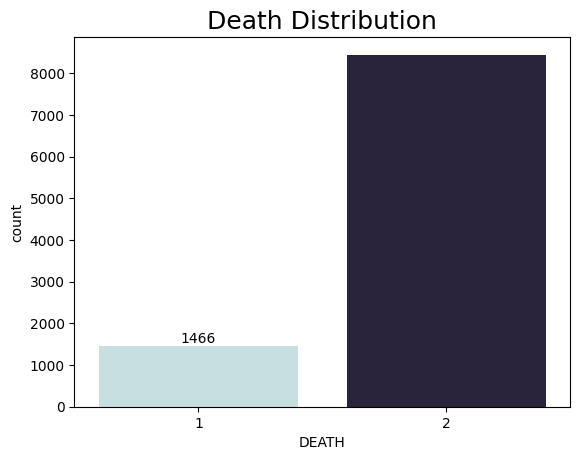

In [ ]:
ax = sns.countplot(x=covid['DEATH'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

* There is an imbalance Dataset Problem
* Use Undersampling method to balance out the dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


<ipython-input-38-87b2058c27a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')


Text(0.5, 1.0, 'Death Distribution After Resampling')

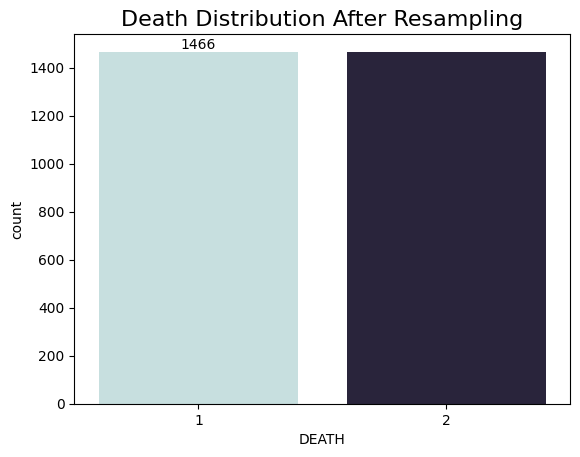

In [ ]:
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16)

### Train the model after undersampling

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (2345, 18)
Test X : (587, 18)
Train Y : (2345,)
Test Y : (587,)


In [ ]:
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", log_reg.score(test_x, test_y))

Logistic Regression Accuracy : 0.8466780238500852


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score : ", f1_score(test_y, log_reg.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.84949833 0.84375   ]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

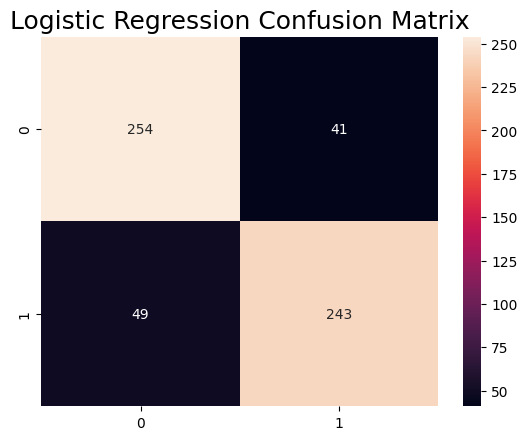

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

* Logistic Regression Model seems to have better **sensitivity**
* which is important since we need to find out who is at risk and take medical measures

# Conclustion

* predict patients who are at high risk of death from covid
* uses undersampling method to solve imbalance dataset problem
* tested logistic regression and random forest algorithm
* logistic regression seemed to have better sensitivity than random forest